In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'C:/Users/91895/Desktop/Adult-income-prediction/Adult-Income-Kaggle-dataset/data/adult.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data.shape

(48842, 15)

In [7]:
cat_feat = data.columns[data.dtypes == "object"]
print(cat_feat)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [8]:
num_feat = data.columns[data.dtypes != "object"]
print(num_feat)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


Data Preprocessing

In [9]:
#dealing with missing values
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [13]:
data['age'] = data['age'].astype(float)
data['hours-per-week'] = data['hours-per-week'].astype(float)

In [14]:
df = data.dropna()

In [15]:
df.shape

(48842, 15)

BASIC EDA

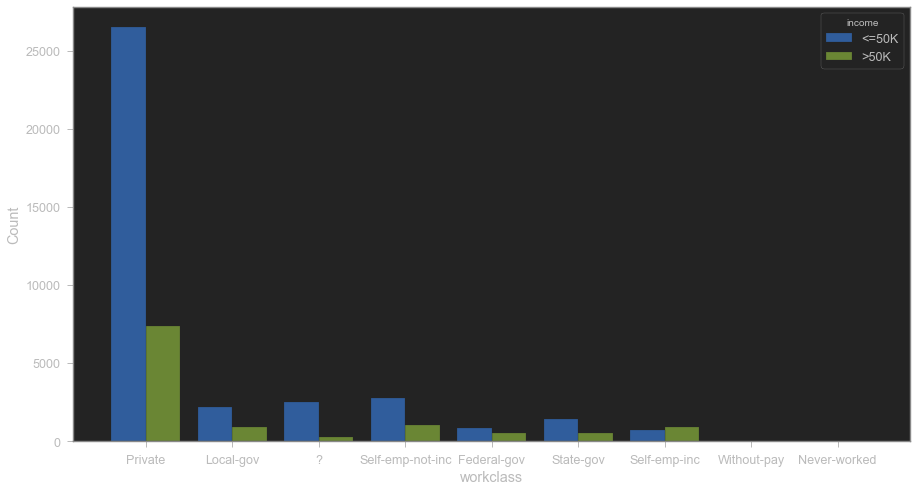

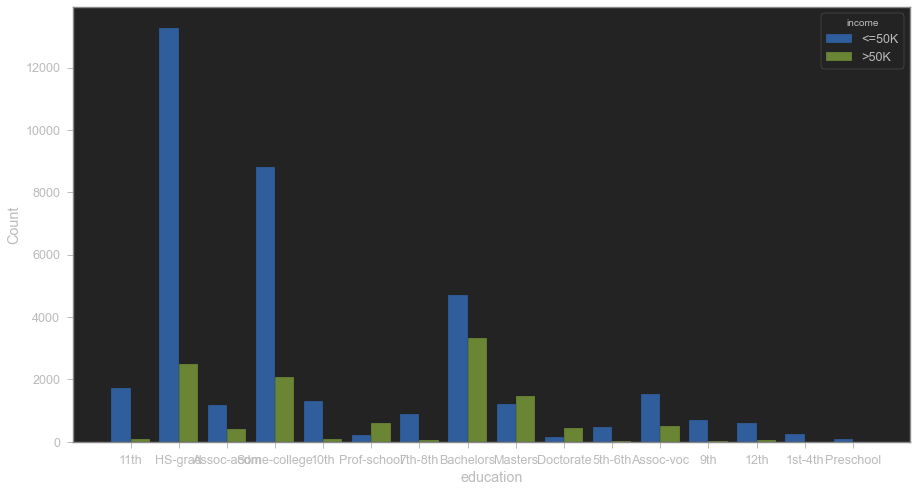

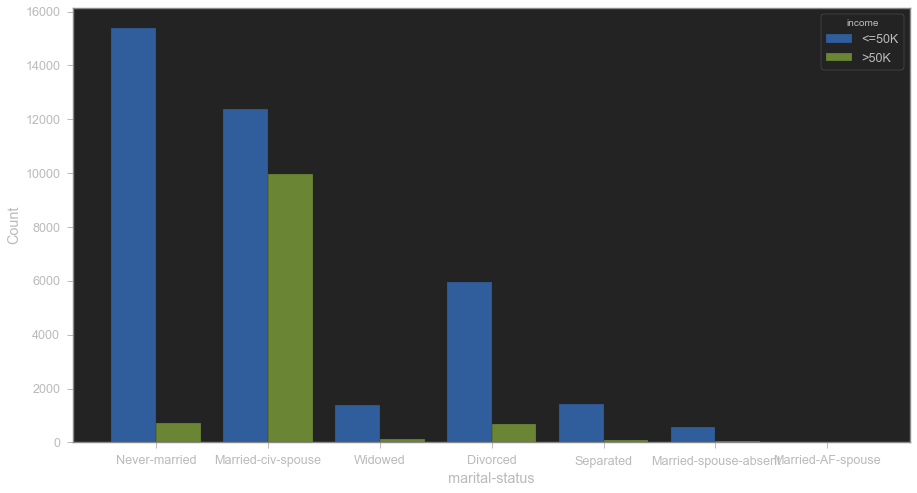

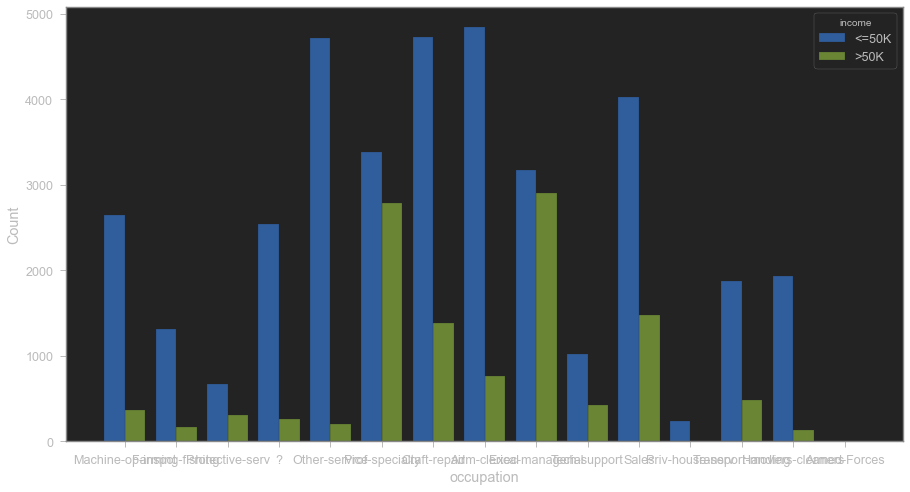

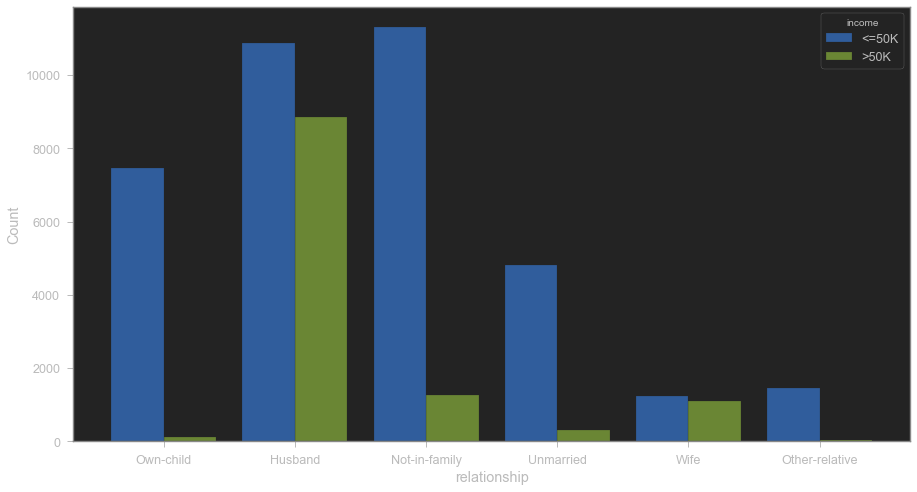

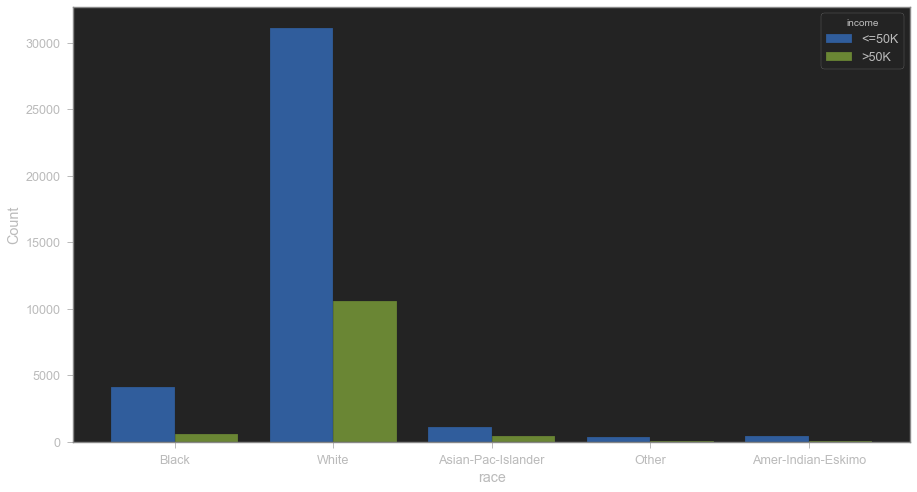

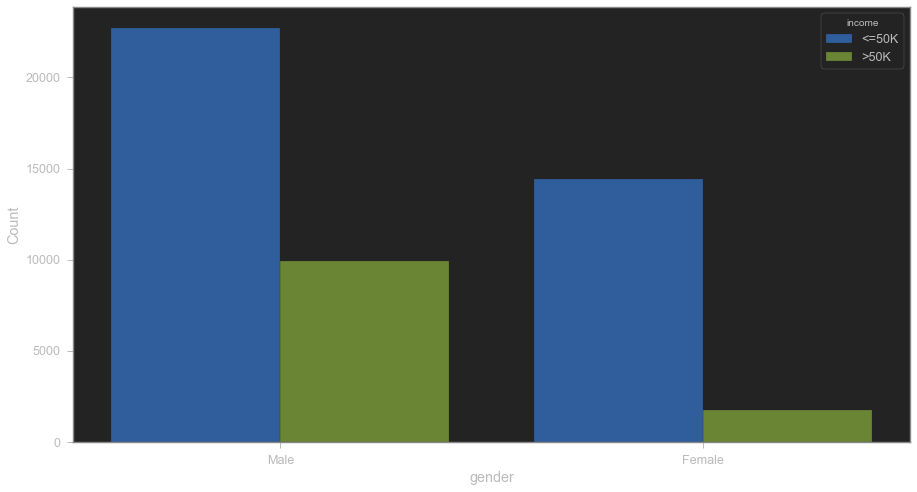

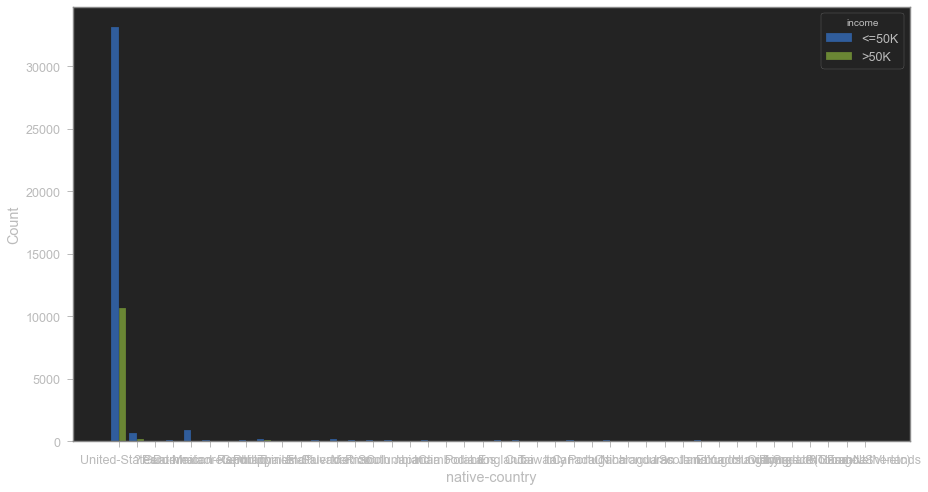

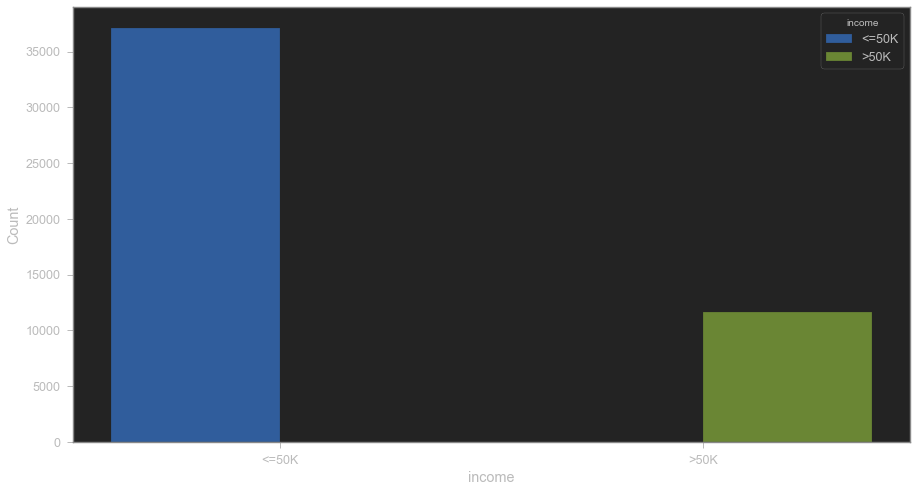

In [16]:
for col in cat_feat:
  plt.figure(figsize = (15,8))
  sns.histplot(x = col, hue = 'income', data = data,stat="count",multiple = "dodge", shrink = .8)
  plt.show()

<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:xlabel='income', ylabel='count'>

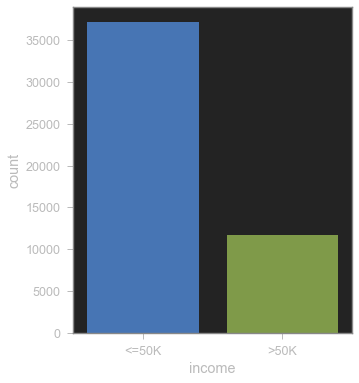

In [17]:
print(data.income.value_counts())
fig = plt.figure(figsize=(5,6))
sns.countplot(x='income', data = data)

Income of >50K is 1/3 of <=50K which implies data is imblanced and somewhat skewed. Some feature engineering is required for balancing data.

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


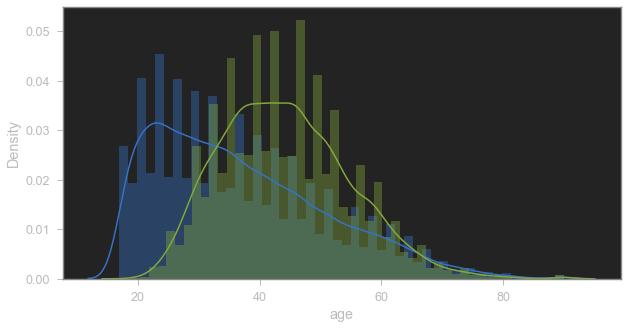

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


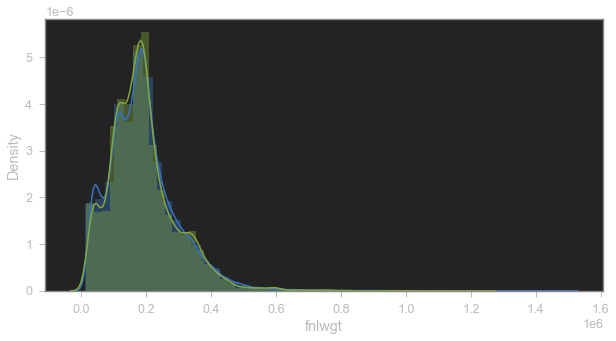

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


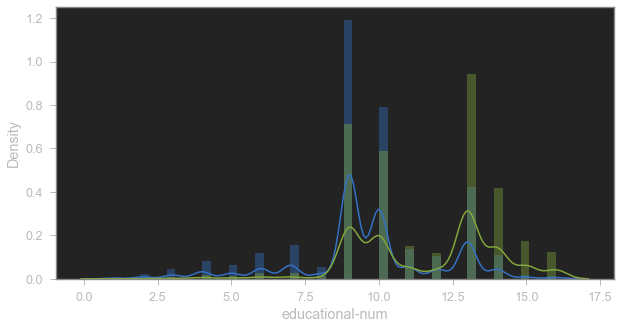

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


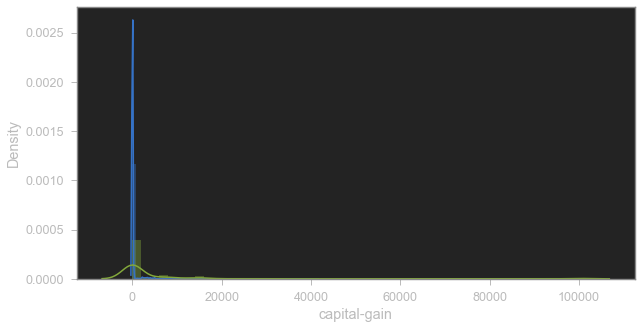

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


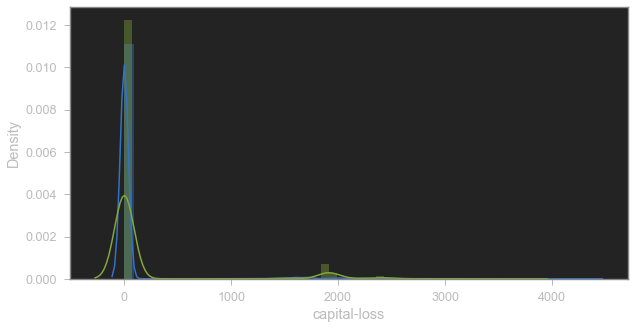

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


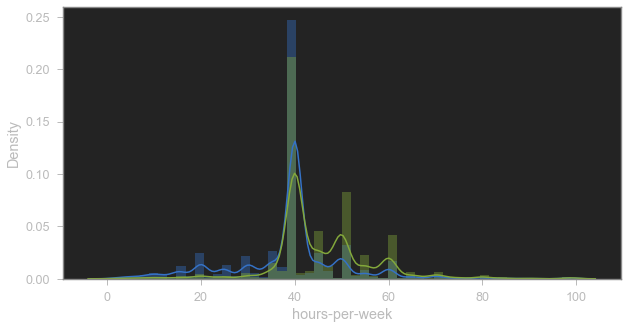

In [18]:
for col in num_feat:
  plt.figure(figsize = (10,5))
  #sns.distplot(data[col])
  sns.distplot(data[data['income'] == '<=50K'][col], kde_kws={"label": "<=$50K"})
  sns.distplot(data[data['income'] == '>50K'][col], kde_kws={"label": "<=$50K"})
  plt.show()

Feature Engineering

In [19]:
for col in cat_feat:
  print(col, data[col].unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

Education

In [20]:
data[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
10,Doctorate,16.0
14,Prof-school,15.0
12,Masters,14.0
9,Bachelors,13.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
15,Some-college,10.0
11,HS-grad,9.0
2,12th,8.0
1,11th,7.0


In [21]:
data.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [22]:
#Education
data['education'].replace('droput','dropout', inplace = True)
data['education'].replace('Preschool','dropout', inplace = True)
data['education'].replace('5th-6th','dropout', inplace = True)
data['education'].replace('10th','dropout', inplace = True)
data['education'].replace('11th','dropout', inplace = True)
data['education'].replace('12th','dropout', inplace = True)
data['education'].replace('1st-4th','dropout', inplace = True)
data['education'].replace('9th','dropout', inplace = True)
data['education'].replace('7th-8th','dropout', inplace = True)
data['education'].replace('HS-grad','HS', inplace = True)
data['education'].replace('Some-college','College', inplace = True)
data['education'].replace('Assoc-voc','College', inplace = True)
data['education'].replace('Assoc-acdm','College', inplace = True)
data['education'].replace('Prof-school','Masters', inplace = True)


In [23]:
data[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
2,Doctorate,16.000000
4,Masters,14.238900
0,Bachelors,13.000000
1,College,10.361967
3,HS,9.000000
5,dropout,5.614544


<AxesSubplot:xlabel='education', ylabel='count'>

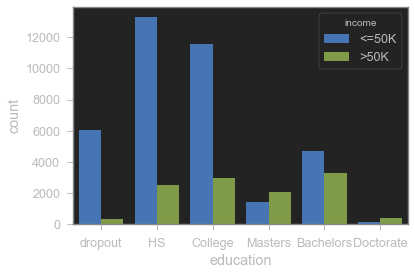

In [24]:
sns.countplot(x = 'education',hue = 'income', data = data)

Marital Status


In [25]:
data['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
data['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
data['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

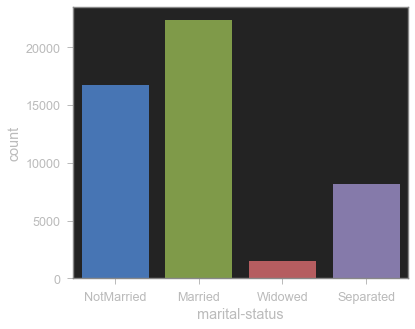

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'marital-status', data = data)
plt.show()

occupation

In [27]:
data['occupation'].replace('?','Other-service', inplace = True)

Other-service        7732
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


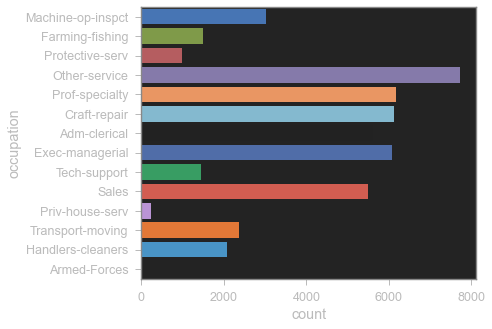

In [28]:
print(data.occupation.value_counts())
plt.figure(figsize = (6,5))
sns.countplot(y = 'occupation', data = data)
#sns.histplot(x = 'occupation', data = data, hue = 'income')
plt.show()

Workclass

<AxesSubplot:xlabel='workclass', ylabel='count'>

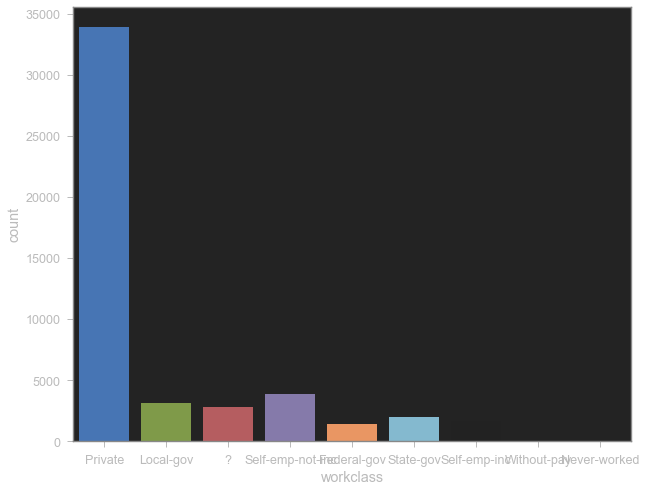

In [29]:
plt.figure(figsize=(10,8)) 
sns.countplot(x="workclass", data=data)

Age

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

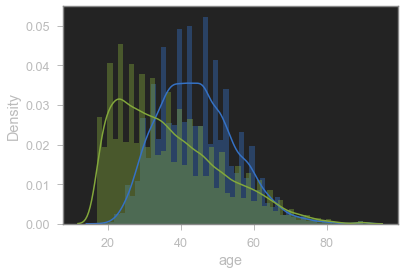

In [30]:
sns.distplot(data[data['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(data[data['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

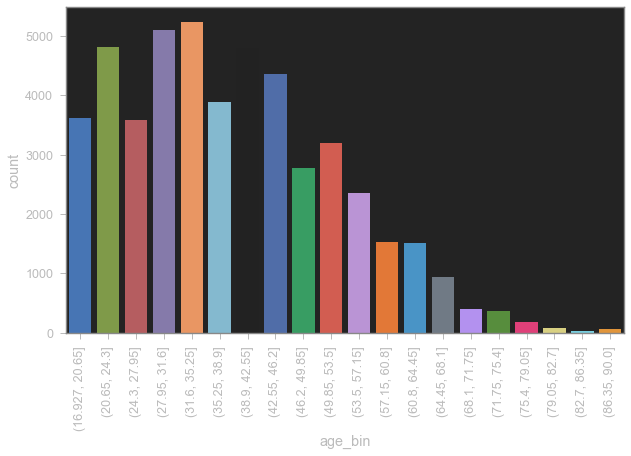

In [31]:
data['age_bin'] = pd.cut(data['age'],20)
plt.figure(figsize=(10,6))
ax = sns.countplot(x="age_bin", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [32]:
data[['income','age']].groupby(['income']).mean().sort_values(by='age',ascending = False)

,age
income,
>50K,44.275178
<=50K,36.872184


Race

In [33]:
data.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

<Figure size 1440x720 with 0 Axes>

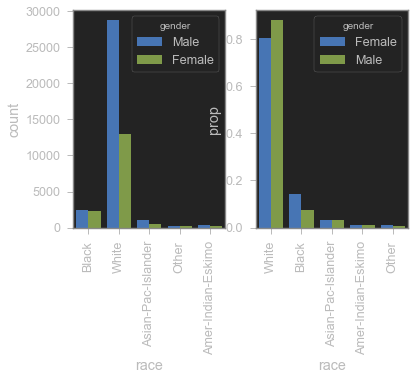

In [34]:
plt.figure(figsize =(20,10))
f,axes = plt.subplots(1,2)
ax1 = sns.countplot(x = 'race', data = data, hue = 'gender', ax = axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2 = sns.barplot(x = 'race',y = 'prop', data =(data['race']
           .groupby(data['gender'])
           .value_counts(normalize=True)
           .rename('prop')
           .reset_index()), hue = 'gender', ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.show()

Hours of work

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

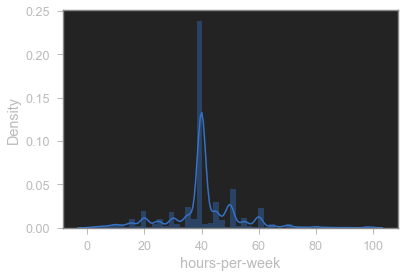

In [35]:
sns.distplot(data['hours-per-week'])

In [36]:
data['hours-per-week_bin'] = pd.cut(data['hours-per-week'], 10)

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

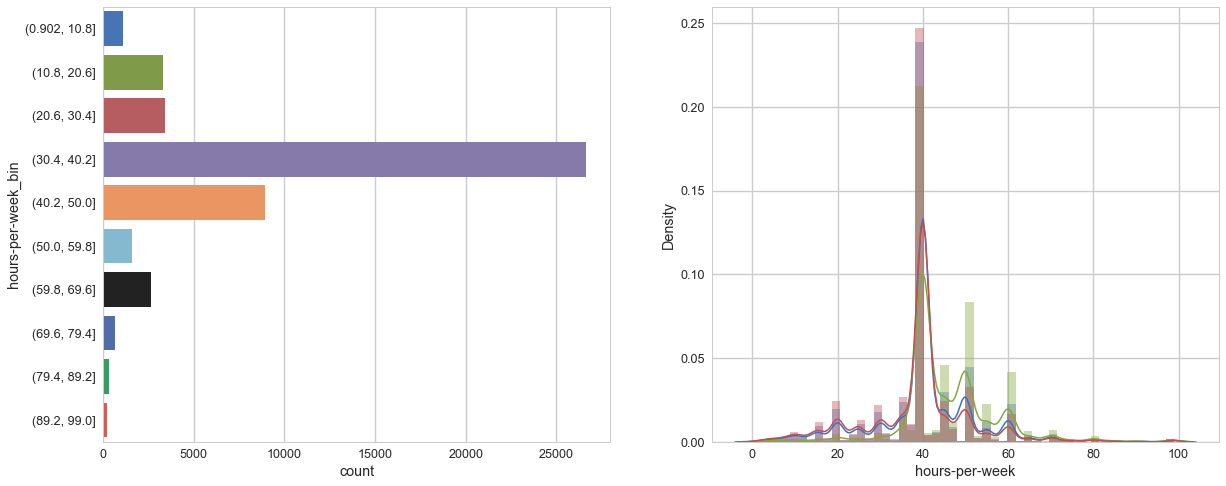

In [37]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(y ='hours-per-week_bin', data = data);
plt.subplot(1,2,2)
sns.distplot(data['hours-per-week'])
sns.distplot(data[data['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(data[data['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})

create a cross feature

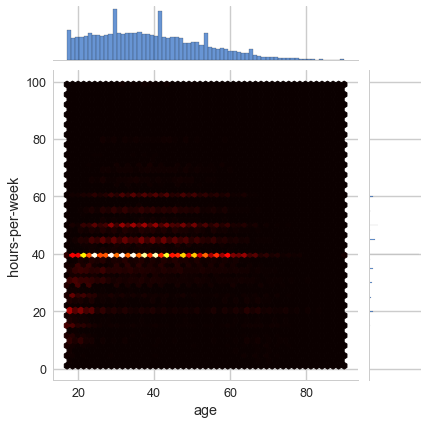

In [38]:
g = sns.jointplot(x = 'age', y = 'hours-per-week', data =data, kind = 'hex', cmap = 'hot')

In [39]:
#crossing num_Feat
data['age-hours'] = data['age']*data['hours-per-week']
data['age-hours-bin']  = pd.cut(data['age-hours'], 10)


c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age-hours', ylabel='Density'>

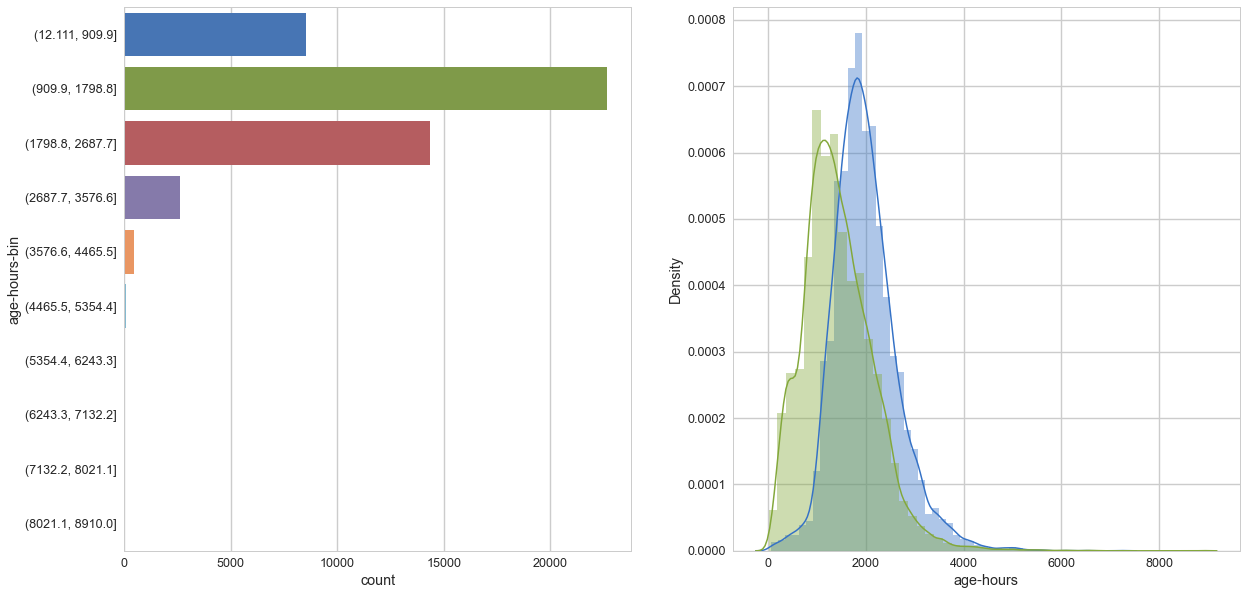

In [40]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours-bin", data=data);
plt.subplot(1, 2, 2)
sns.distplot(data[data['income'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(data[data['income'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

BIVARIATE ANALYSIS

c:\Users\91895\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


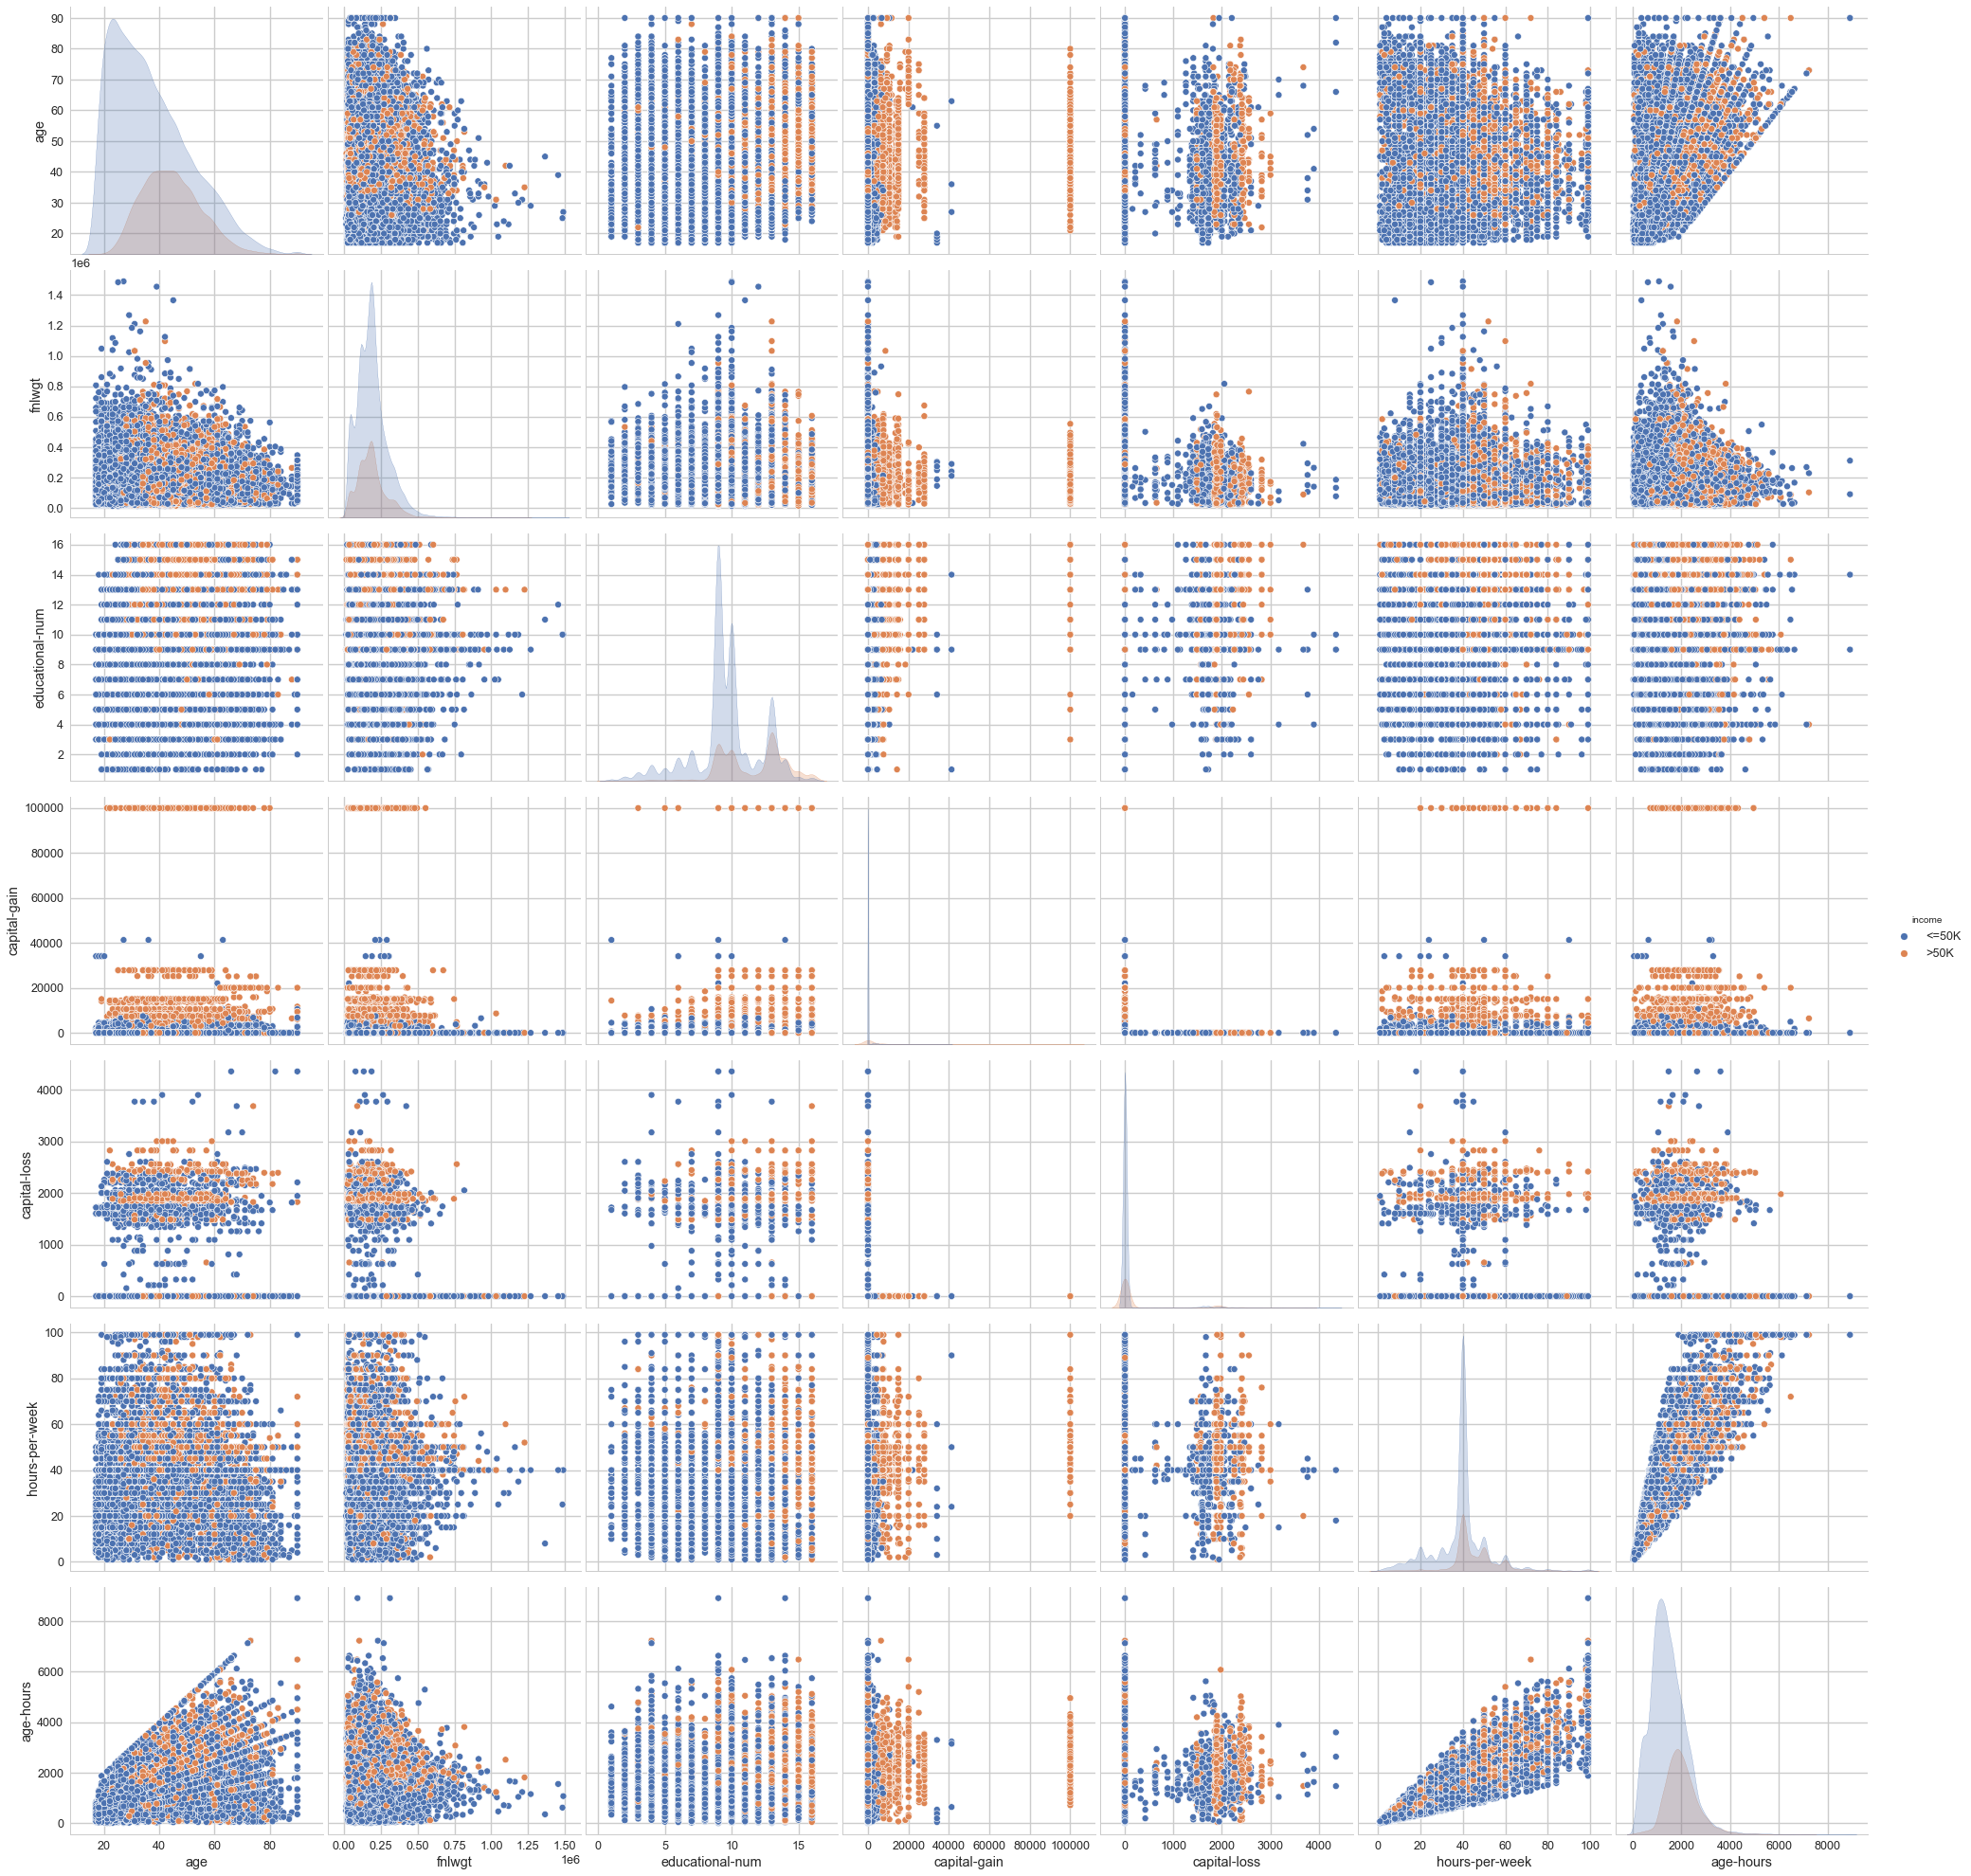

In [41]:
sns.pairplot(data , hue = 'income', palette = 'deep', size = 4)

<AxesSubplot:>

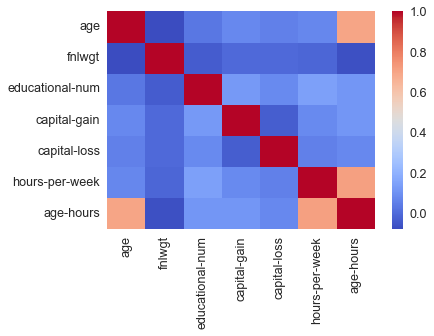

In [42]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

Occupation vs Income

<AxesSubplot:xlabel='occupation', ylabel='age'>

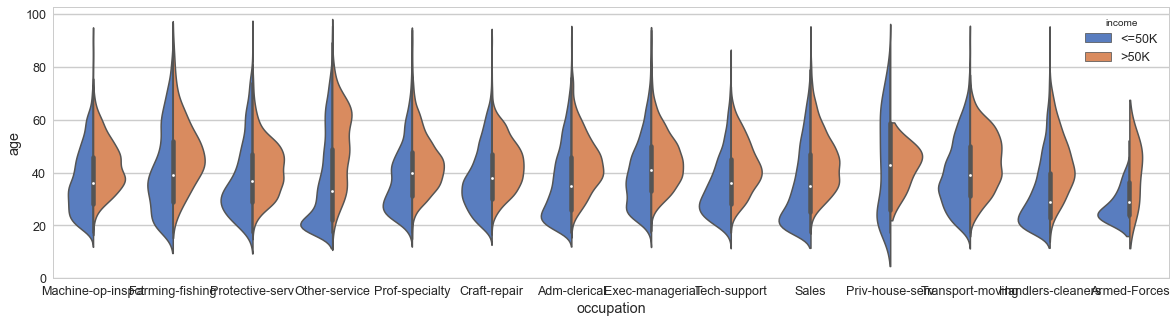

In [43]:
f, ax = plt.subplots(figsize = (20,5))
ax = sns.violinplot(x="occupation", y="age", hue="income",
                    data=data, gridsize=100, palette="muted", split=True, saturation=0.75)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax

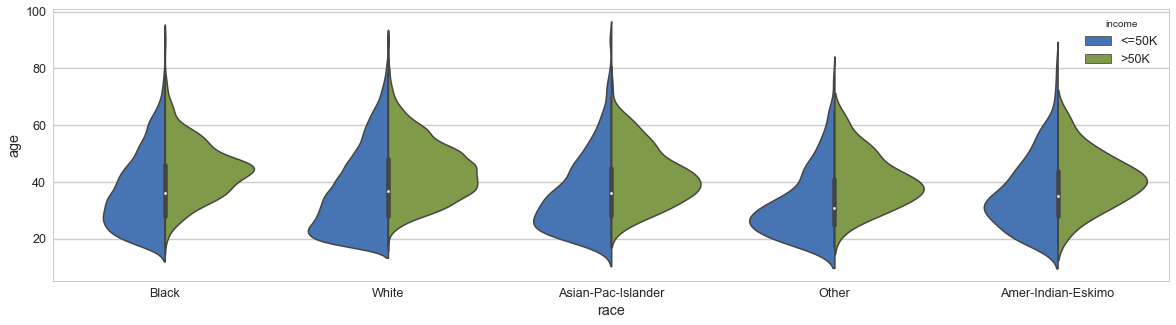

In [44]:
#race vs income
f,ax = plt.subplots(figsize = (20,5))
ax = sns.violinplot(x = 'race', y = 'age', hue = 'income', data= data, split = True)

Feature scaling and encoding

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR

In [46]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin,age-hours,age-hours-bin
0,8,4,19329,5,6,1,6,3,2,1,0,0,39,39,0,2,3,478,1
1,21,4,4212,3,8,0,4,0,4,1,0,0,49,39,0,5,4,818,2
2,11,2,25340,1,11,0,10,0,4,1,0,0,39,39,1,3,3,530,1
3,27,4,11201,1,9,0,6,0,2,1,98,0,39,39,1,7,3,766,1
4,1,0,5411,1,9,1,7,3,4,0,0,0,29,39,0,0,2,285,0


Train-Test-Split

In [47]:
drop_elements = ['education', 'native-country', 'income', 'age_bin', 'age-hours-bin','hours-per-week_bin']
y = data["income"]
X = data.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,age-hours
0,8,4,19329,6,1,6,3,2,1,0,0,39,478
1,21,4,4212,8,0,4,0,4,1,0,0,49,818
2,11,2,25340,11,0,10,0,4,1,0,0,39,530
3,27,4,11201,9,0,6,0,2,1,98,0,39,766
4,1,0,5411,9,1,7,3,4,0,0,0,29,285


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.21259591, 0.32758926, 0.41456481, 0.49568533, 0.5766097 ,
       0.65461653, 0.72881811, 0.80087446, 0.86689279, 0.92505555,
       0.96812701, 0.99800622, 1.        ])

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 50000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6955711389898925
0.8245470365441704


In [52]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8573037158358071


In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)
print('ROC score',roc_auc_score(y_test,y_pred))
print('Accuracy score',accuracy_score(y_test,y_pred))

[18:06:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\91895\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ROC score 0.7906081970147201
Accuracy score 0.8704063875524619
